In [11]:
library(corrplot)
library(PerformanceAnalytics)
library(ggplot2)
library(FactoMineR)
library(factoextra)
library(dplyr)
library(lattice)
library(cluster)
library(visreg)
library(car)
library(tidyr)
library(caret)
library(forcats) # fct_recode function
library(repr)    # for figure size
library(randomForest)

In [12]:
is.Date <- function(x) inherits(x, 'Date')

In [13]:
# library(summarytools)

# Importation du fichier

In [14]:
test_origin <- read.csv('origin-test.csv', row.names=1)
test = test_origin

In [15]:
cat("nombre d'input : ", nrow(test))
cat('\n')
cat("nombre de features : ", ncol(test))

nombre d'input :  1459
nombre de features :  79

## Rechercher des colonnes quantitatives et catégorielles

In [16]:
test_quant = select_if(test, is.numeric)
test_qual = select_if(test, is.factor)

# Traitement des features

## Variables pas vraiment numériques -> conversion en date

- YearBuilt
- YearRemodAdd
- GarageYrBlt
- MoSold
- YrSold

In [17]:
test$YearBuilt <- as.Date(
    ISOdate(test[, 'YearBuilt'], 01, 01), format = "%Y")
test$YearRemodAdd <- as.Date(
    ISOdate(test[, 'YearRemodAdd'], 01, 01), format = "%Y")
test$GarageYrBlt <- as.Date(
    ISOdate(test[, 'GarageYrBlt'], 01, 01), format = "%Y")
test$YrSold <- as.Date(
    ISOdate(test[, 'YrSold'], test[, 'MoSold'], 01), format = "%Y")

test = select(test, -MoSold)

## Variables ordinales transformables

In [18]:
test$LotShape <- fct_recode(test$LotShape,
                   '1' = 'IR3', '2' = 'IR2', '3' = 'IR1', '4' = 'Reg')
test$LotShape <- as.numeric(as.character(test$LotShape))

In [19]:
test$LandContour <- test$LandContour %>%
    fct_recode('1' = 'Low', '2' = 'HLS', '3' = 'Bnk', '4' = 'Lvl')
test$LandContour <- as.numeric(as.character(test$LandContour))

In [20]:
test$Utilities <- test$Utilities %>%
    fct_recode('1' = 'ELO', '2' = 'NoSeWa', '3' = 'NoSewr', '4' = 'AllPub')
test$Utilities <- as.numeric(as.character(test$Utilities))

Warning message:
“Unknown levels in `f`: ELO, NoSeWa, NoSewr”

In [21]:
test$LandSlope <- test$LandSlope %>%
    fct_recode('1' = 'Sev', '2' = 'Mod', '3' = 'Gtl')
test$LandSlope <- as.numeric(as.character(test$LandSlope))

In [22]:
test$ExterQual <- test$ExterQual %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$ExterQual <- as.numeric(as.character(test$ExterQual))

Warning message:
“Unknown levels in `f`: Po”

In [23]:
test$ExterCond <- test$ExterCond %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$ExterCond <- as.numeric(as.character(test$ExterCond))

In [24]:
test$BsmtQual <- test$BsmtQual %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$BsmtQual <- as.numeric(as.character(test$BsmtQual))

Warning message:
“Unknown levels in `f`: Po”

In [25]:
test$BsmtCond  <- test$BsmtCond  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$BsmtCond  <- as.numeric(as.character(test$BsmtCond))

Warning message:
“Unknown levels in `f`: Ex”

In [26]:
test$BsmtExposure  <- test$BsmtExposure  %>%
    fct_recode('1' = 'No', '2' = 'Mn', '3' = 'Av', '4' = 'Gd')
test$BsmtExposure  <- as.numeric(as.character(test$BsmtExposure))

In [27]:
test$BsmtFinType1  <- test$BsmtFinType1  %>%
    fct_recode('1' = 'Unf', '2' = 'LwQ', '3' = 'Rec',
               '4' = 'BLQ', '5' = 'ALQ', '6' = 'GLQ')
test$BsmtFinType1  <- as.numeric(as.character(test$BsmtFinType1))

In [28]:
test$BsmtFinType2  <- test$BsmtFinType2  %>%
    fct_recode('1' = 'Unf', '2' = 'LwQ', '3' = 'Rec',
               '4' = 'BLQ', '5' = 'ALQ', '6' = 'GLQ')
test$BsmtFinType2  <- as.numeric(as.character(test$BsmtFinType2))

In [29]:
test$HeatingQC  <- test$HeatingQC  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$HeatingQC  <- as.numeric(as.character(test$HeatingQC))

In [30]:
test$CentralAir  <- test$CentralAir  %>%
    fct_recode('0' = 'N', '1' = 'Y')
test$CentralAir  <- as.numeric(as.character(test$CentralAir))

In [31]:
test$Electrical  <- test$Electrical  %>%
    fct_recode('1' = 'Mix', '2' = 'FuseP', '3' = 'FuseF', '4' = 'FuseA', '5' = 'SBrkr')
test$Electrical  <- as.numeric(as.character(test$Electrical))

Warning message:
“Unknown levels in `f`: Mix”

In [32]:
test$KitchenQual  <- test$KitchenQual  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$KitchenQual  <- as.numeric(as.character(test$KitchenQual))

Warning message:
“Unknown levels in `f`: Po”

In [33]:
test$Functional <- test$Functional  %>%
    fct_recode('1' = 'Sal', '2' = 'Sev', '3' = 'Maj2', '4' = 'Maj1',
               '5' = 'Mod', '6' = 'Min2', '7' = 'Min1', '8' = 'Typ')
test$Functional <- as.numeric(as.character(test$Functional))

Warning message:
“Unknown levels in `f`: Sal”

In [34]:
#test$FireplaceQu  <- test$FireplaceQu  %>%
#    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
#test$FireplaceQu  <- as.numeric(as.character(test$FireplaceQu))

In [35]:
#test$GarageFinish  <- test$GarageFinish  %>%
#    fct_recode('1' = 'Unf', '2' = 'RFn', '3' = 'Fin')
#test$GarageFinish  <- as.numeric(as.character(test$GarageFinish))

In [36]:
test$GarageQual  <- test$GarageQual  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$GarageQual  <- as.numeric(as.character(test$GarageQual))

Warning message:
“Unknown levels in `f`: Ex”

In [37]:
test$GarageCond  <- test$GarageCond  %>%
    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
test$GarageCond  <- as.numeric(as.character(test$GarageCond))

In [38]:
test$PavedDrive  <- test$PavedDrive  %>%
    fct_recode('1' = 'N', '2' = 'P', '3' = 'Y')
test$PavedDrive  <- as.numeric(as.character(test$PavedDrive))

In [39]:
#test$PoolQC  <- test$PoolQC  %>%
#    fct_recode('1' = 'Po', '2' = 'Fa', '3' = 'TA', '4' = 'Gd', '5' = 'Ex')
#test$PoolQC  <- as.numeric(as.character(test$PoolQC))

In [40]:
#test$Fence  <- test$Fence  %>%
#    fct_recode('1' = 'MnWw', '2' = 'GdWo', '3' = 'MnPrv', '4' = 'GdPrv')
#test$Fence  <- as.numeric(as.character(test$Fence))

## Features avec beaucoup de 0 (3rd quartile = 0)

In [41]:
test <- select(test, - BsmtFinSF2, - LowQualFinSF, - EnclosedPorch,
                    - X3SsnPorch, - ScreenPorch, - PoolArea, - MiscVal,
                    - LandContour, - LandSlope, - BsmtCond, - BsmtFinType2,
                    - KitchenAbvGr, - Functional, - GarageQual, - GarageCond)

## Modalités avec faibles occurences (<10)

In [42]:
# test <- select(test, -Street, -Utilities, -Condition2, -MiscFeature)
test <- select(test, -Street, -Utilities, -Condition2)

In [43]:
test <- test[-which(test$LotConfig == 'FR3' |
      test$Foundation == 'Wood' | test$Foundation == 'Stone' |
      test$GarageType == '2Types' | test$GarageType == 'carport' |
      test$SaleCondition == 'AdjLand'),]

In [44]:
test$Heating  <- test$Heating  %>%
    fct_recode('0' = 'GasA',
               '1' = 'Floor', '1' = 'GasW', '1' = 'Grav',
               '1' = 'OthW', '1' = 'Wall')
test$Heating  <- as.numeric(as.character(test$Heating))

Warning message:
“Unknown levels in `f`: Floor, OthW”

In [45]:
test$RoofMatl  <- test$RoofMatl  %>%
    fct_recode('0' = 'CompShg',
               '1' = 'ClyTile', '1' = 'Membran', '1' = 'Metal',
               '1' = 'Roll', '1' = 'Tar&Grv', '1' = 'WdShake', '1' = 'WdShngl')
test$RoofMatl  <- as.numeric(as.character(test$RoofMatl))

Warning message:
“Unknown levels in `f`: ClyTile, Membran, Metal, Roll”

In [46]:
levels(test$MiscFeature) <- c(levels(test$MiscFeature), 'None')
test$MiscFeature[which(is.na(test$MiscFeature))] <- 'None'
test$MiscFeature <- test$MiscFeature  %>%
    fct_recode('0' = 'None',
               '1' = 'Elev', '1' = 'Gar2', '1' = 'Othr',
               '1' = 'Shed', '1' = 'TenC')
test$MiscFeature <- as.numeric(as.character(test$MiscFeature))

Warning message:
“Unknown levels in `f`: Elev, TenC”

## Données manquantes

In [47]:
levels(test$Alley) <- c(levels(test$Alley), 'None')
test$Alley[which(is.na(test$Alley))] <- 'None'

In [48]:
levels(test$FireplaceQu) <- c(levels(test$FireplaceQu), 'None')
test$FireplaceQu[which(is.na(test$FireplaceQu))] <- 'None'

In [49]:
levels(test$GarageType) <- c(levels(test$GarageType), 'None')
test$GarageType[which(is.na(test$GarageType))] <- 'None'

In [50]:
levels(test$GarageFinish) <- c(levels(test$GarageFinish), 'None')
test$GarageFinish[which(is.na(test$GarageFinish))] <- 'None'

In [51]:
levels(test$PoolQC) <- c(levels(test$PoolQC), 'None')
test$PoolQC[which(is.na(test$PoolQC))] <- 'None'

In [52]:
levels(test$Fence) <- c(levels(test$Fence), 'None')
test$Fence[which(is.na(test$Fence))] <- 'None'

In [53]:
test <- test[which(!is.na(test$LotFrontage)),]
test <- test[which(!is.na(test$MasVnrType)),]
test <- test[which(!is.na(test$MasVnrArea)),]
test <- test[which(!is.na(test$BsmtQual)),]
test <- test[which(!is.na(test$BsmtExposure)),]
test <- test[which(!is.na(test$BsmtFinType1)),]
test <- test[which(!is.na(test$Electrical)),]

In [54]:
NA_lines = which(is.na(test$GarageYrBlt))
test$GarageYrBlt[NA_lines] <- test$YearBuilt[NA_lines]

## Vérification si plus de données manquantes

In [55]:
for (i in 1:ncol(test)){
    na_number <- length(which(is.na(test[, i])))
    if (na_number > 0){
        cat(na_number, colnames(select(test, i)),'\n')
    }
}

1 Exterior1st 
1 Exterior2nd 
1 KitchenQual 
1 GarageCars 
1 GarageArea 
1 SaleType 


## Résultat après nettoyage

In [56]:
head(test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,⋯,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
,<int>,<fct>,<int>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<dbl>,<date>,<fct>,<fct>
1461,20,RH,80,11622,None,4,Inside,NAmes,Feedr,1Fam,⋯,730,3,140,0,None,MnPrv,0,2010-06-01,WD,Normal
1462,20,RL,81,14267,None,3,Corner,NAmes,Norm,1Fam,⋯,312,3,393,36,None,None,1,2010-06-01,WD,Normal
1463,60,RL,74,13830,None,3,Inside,Gilbert,Norm,1Fam,⋯,482,3,212,34,None,MnPrv,0,2010-03-01,WD,Normal
1464,60,RL,78,9978,None,3,Inside,Gilbert,Norm,1Fam,⋯,470,3,360,36,None,None,0,2010-06-01,WD,Normal
1465,120,RL,43,5005,None,3,Inside,StoneBr,Norm,TwnhsE,⋯,506,3,0,82,None,None,0,2010-01-01,WD,Normal
1466,60,RL,75,10000,None,3,Corner,Gilbert,Norm,1Fam,⋯,440,3,157,84,None,None,0,2010-04-01,WD,Normal


In [57]:
cat("nombre d'input : ", nrow(test))
cat('\n')
cat("nombre de features : ", ncol(test))

nombre d'input :  1152
nombre de features :  60

In [58]:
test_quant = select_if(test, is.numeric)
test_date = select_if(test, is.Date)
test_qual = select_if(test, is.factor)
cat('nombre de variables quantitatives : ', ncol(test_quant))
cat('\n')
cat('nombre de variables type date : ', ncol(test_date))
cat('\n')
cat('nombre de variables catégorielles : ', ncol(test_qual))

nombre de variables quantitatives :  37
nombre de variables type date :  4
nombre de variables catégorielles :  19

# Analyse du dataset

## Résumé par feature

In [59]:
summary(test)

   MSSubClass        MSZoning    LotFrontage        LotArea       Alley     
 Min.   : 20.00   C (all):  9   Min.   : 21.00   Min.   : 1470   Grvl:  61  
 1st Qu.: 20.00   FV     : 58   1st Qu.: 57.00   1st Qu.: 7200   Pave:  30  
 Median : 50.00   RH     :  9   Median : 67.00   Median : 9279   None:1061  
 Mean   : 57.93   RL     :865   Mean   : 67.95   Mean   : 9338              
 3rd Qu.: 70.00   RM     :211   3rd Qu.: 80.00   3rd Qu.:11074              
 Max.   :190.00                 Max.   :160.00   Max.   :51974              
                                                                            
    LotShape       LotConfig    Neighborhood   Condition1    BldgType  
 Min.   :1.000   Corner :189   NAmes  :181   Norm   :992   1Fam  :949  
 1st Qu.:3.000   CulDSac: 41   OldTown:110   Feedr  : 59   2fmCon: 27  
 Median :4.000   FR2    : 27   CollgCr: 92   Artery : 38   Duplex: 31  
 Mean   :3.682   FR3    :  0   NridgHt: 85   RRAn   : 20   Twnhs : 51  
 3rd Qu.:4.000   Inside 

Warning message:
“Removed 3 rows containing non-finite values (stat_bin).”

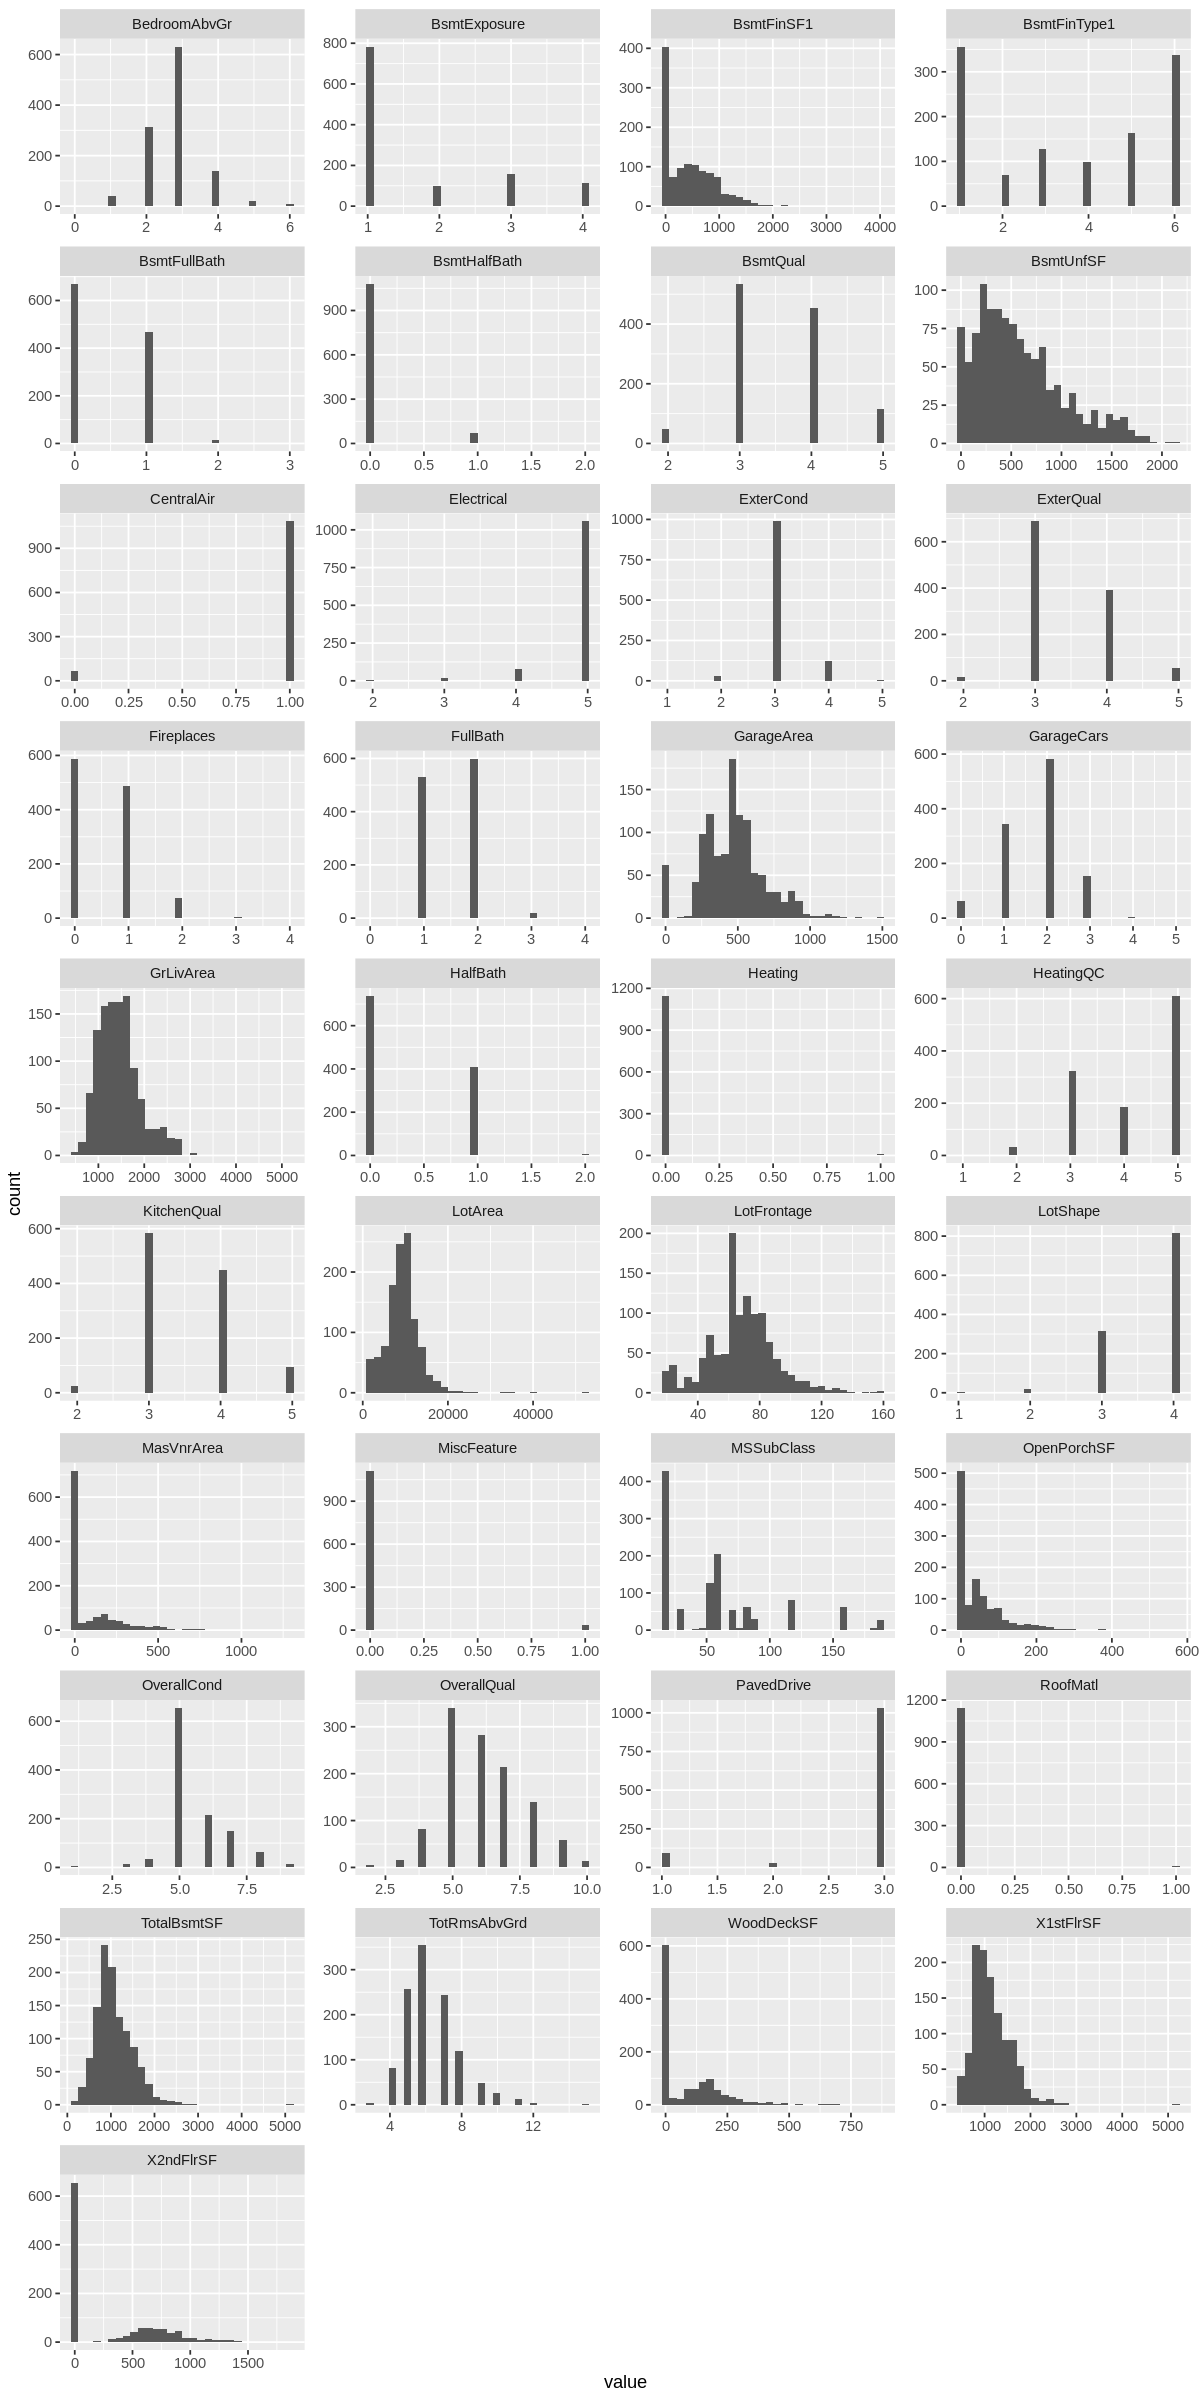

In [60]:
options(repr.plot.width = 10, repr.plot.height = 20)
ggplot(gather(test_quant), aes(value)) +
       geom_histogram(bins = 30) +
       facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

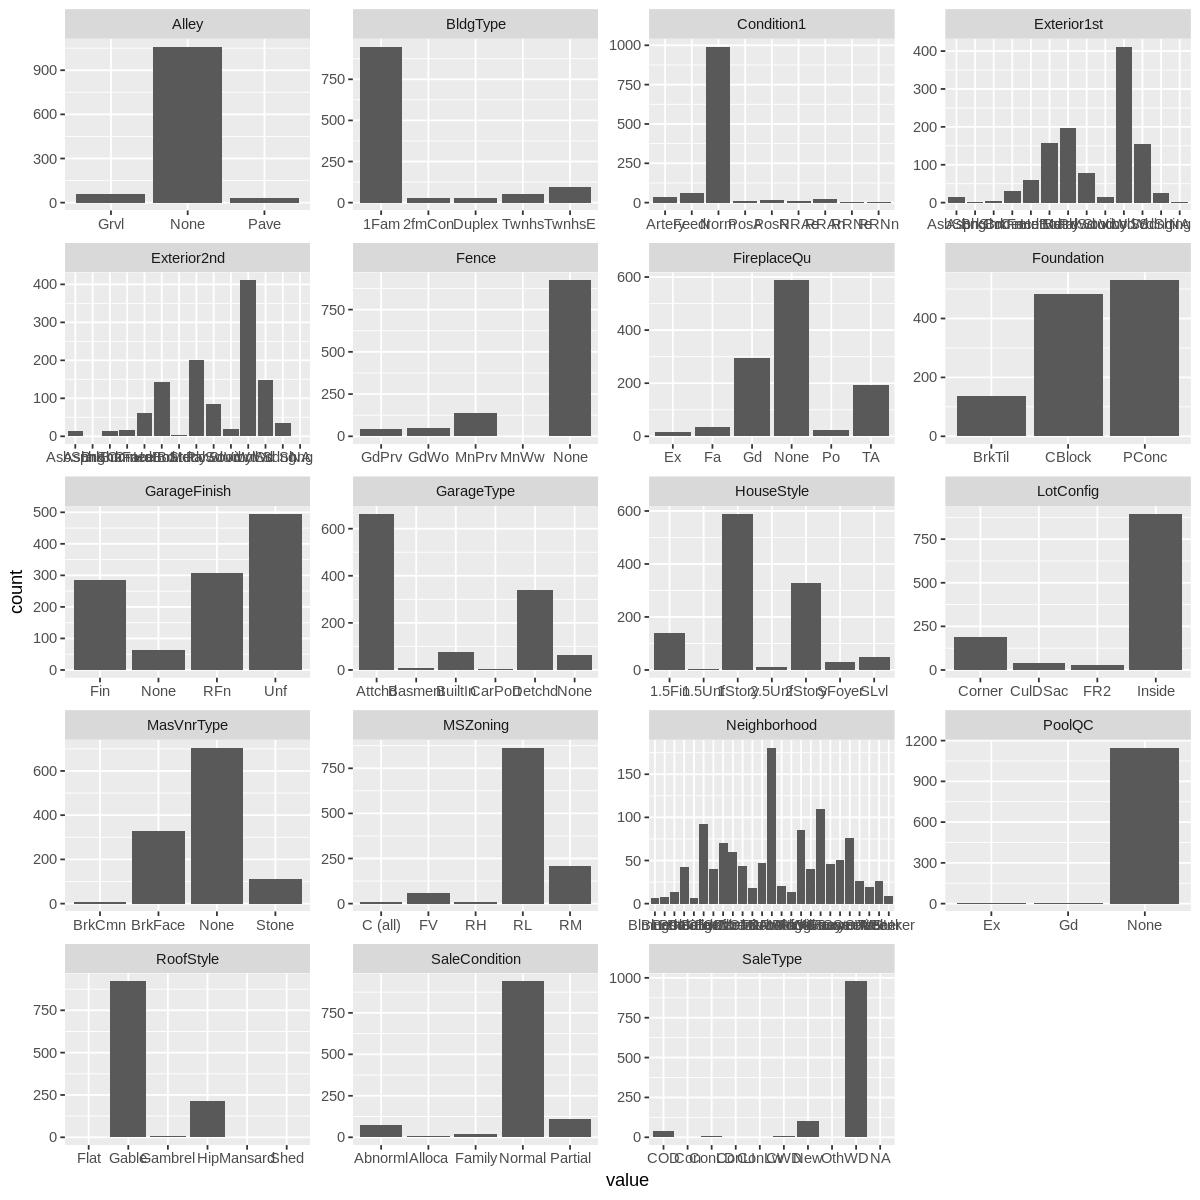

In [61]:
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(gather(test_qual), aes(x=value)) +
    geom_bar() +
    facet_wrap(~key, scales = 'free', ncol = 4)
options(repr.plot.width = 5, repr.plot.height = 3)

## Matrice de corrélation

### Suppression des variables redondantes

In [62]:
test <- select(test,
               -OverallQual,
               -GrLivArea,
               -TotalBsmtSF,
               -GarageCars,
               -ExterQual
              )

# Exportation du test modifié

In [63]:
write.csv(test, 'test_modifié.csv')